In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/Biggest/Downloads/premier-league-matches.csv")

In [3]:
data

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [4]:
data.nunique()

Season_End_Year      31
Wk                   42
Date               3286
Home                 50
HomeGoals            10
AwayGoals            10
Away                 50
FTR                   3
dtype: int64

In [5]:
data.isnull().sum()

Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64

In [6]:
data['Season_End_Year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [7]:
data['Wk'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 28, 25, 26, 27, 29, 30, 33, 31, 32, 34,
       35, 36, 37, 40, 38, 39, 41, 42], dtype=int64)

In [8]:
data['Date'].unique()

array(['1992-08-15', '1992-08-16', '1992-08-17', ..., '2023-05-24',
       '2023-05-25', '2023-05-28'], dtype=object)

In [9]:
data['Home'].unique()

array(['Coventry City', 'Leeds United', 'Sheffield Utd', 'Crystal Palace',
       'Arsenal', 'Ipswich Town', 'Everton', 'Southampton', 'Chelsea',
       "Nott'ham Forest", 'Manchester City', 'Blackburn', 'Wimbledon',
       'Tottenham', 'Liverpool', 'Aston Villa', 'Oldham Athletic',
       'Middlesbrough', 'Norwich City', 'QPR', 'Manchester Utd',
       'Sheffield Weds', 'Newcastle Utd', 'West Ham', 'Swindon Town',
       'Leicester City', 'Bolton', 'Sunderland', 'Derby County',
       'Barnsley', 'Charlton Ath', 'Watford', 'Bradford City', 'Fulham',
       'Birmingham City', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan Athletic', 'Reading', 'Hull City', 'Stoke City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Brentford'], dtype=object)

In [10]:
data['FTR'].unique()

array(['H', 'D', 'A'], dtype=object)

# DATA CLEANING / FEATURE ENGINNERRIG

In [11]:
# Rename data colunms for better understanding

data.rename(columns={"FTR" : 'Full_Time_Result', "Season_End_Year" : "Year", "Wk" : "Match_week"}, inplace=True)

data

,Year,Match_week,Date,Home,HomeGoals,AwayGoals,Away,Full_Time_Result
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [12]:
data["Home_Wins"] = data["HomeGoals"] > data["AwayGoals"]
data["Away_Wins"] = data["AwayGoals"] > data["HomeGoals"]

data

,Year,Match_week,Date,Home,HomeGoals,AwayGoals,Away,Full_Time_Result,Home_Wins,Away_Wins
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,True,False
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,True,False
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,True,False
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,False,False
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,False,True
...,...,...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H,True,False
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H,True,False
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H,True,False
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A,False,True


# EDA- EXPLORATORY DATA ANALYSIS

In [13]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,12026.0,NaN,NaN,NaN,2007.71362,9.072559,1993.0,2000.0,2008.0,2016.0,2023.0
Match_week,12026.0,NaN,NaN,NaN,19.730501,11.123916,1.0,10.0,20.0,29.0,42.0
Date,12026,3286,1994-01-01,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home,12026,50,Manchester Utd,595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomeGoals,12026.0,NaN,NaN,NaN,1.524364,1.306417,0.0,1.0,1.0,2.0,9.0
AwayGoals,12026.0,NaN,NaN,NaN,1.142525,1.13393,0.0,0.0,1.0,2.0,9.0
Away,12026,50,Manchester Utd,595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Full_Time_Result,12026,3,H,5519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_Wins,12026,2,False,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Away_Wins,12026,2,False,8616,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# OBSERVATIONS;

 * The dataset ranges from year 1993 to 2023, it's a 30 year dataset.
 * 42 - the highest match week recorded in premier leauge, i.e team(s) played 42 matches i a season.
 * On 1994-01-01 PL played the highest numbers of match in a day(11 matches played).
 * 9 - the highest goals scored by an away team.
 * 9 - the highest goals scored by an home team.
 * 50 unique teams has competed in the leauge.
 * of the 12026 matches played over the 30 years, home team has won more games, with 5519 home games won.

In [14]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date', 'Home', 'Away', 'Full_Time_Result'], dtype='object')
Numerical Variables:
['Year', 'Match_week', 'HomeGoals', 'AwayGoals']


# EDA - UNIVARIARE ANALYSIS

Year
Skew : 0.02


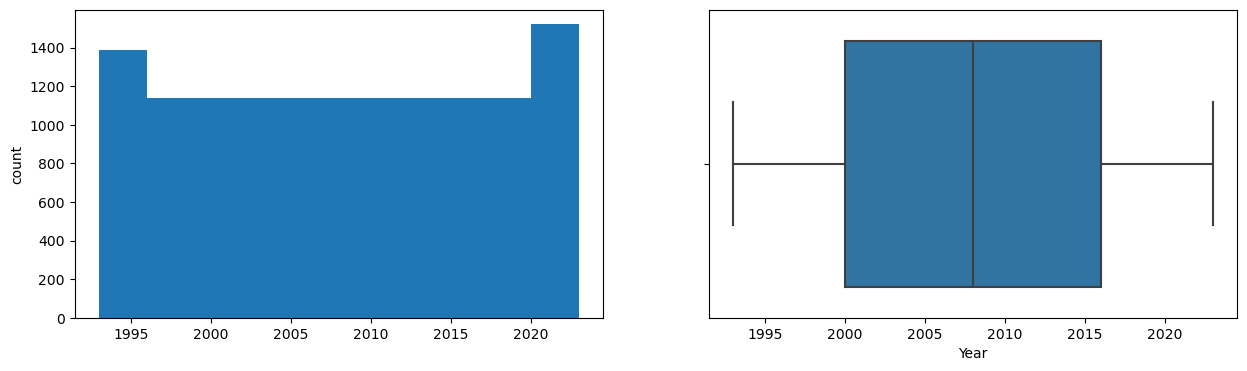

Match_week
Skew : 0.01


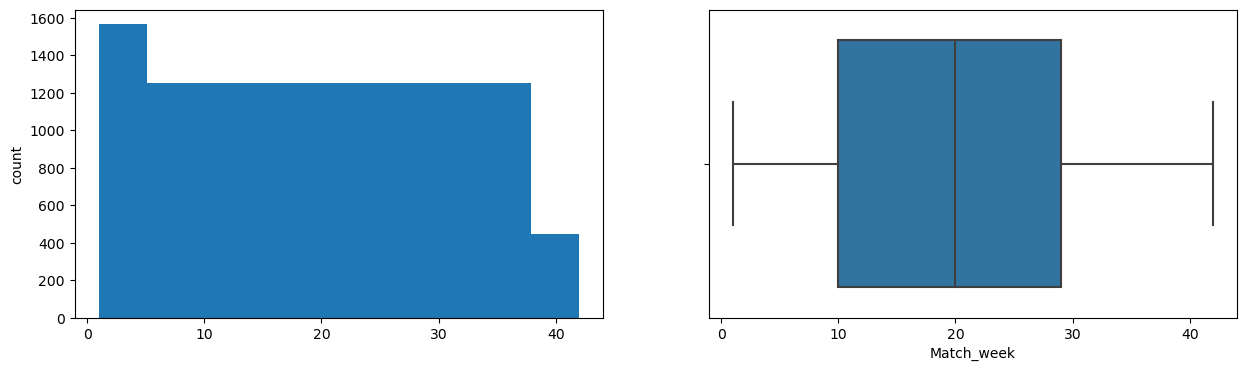

HomeGoals
Skew : 1.01


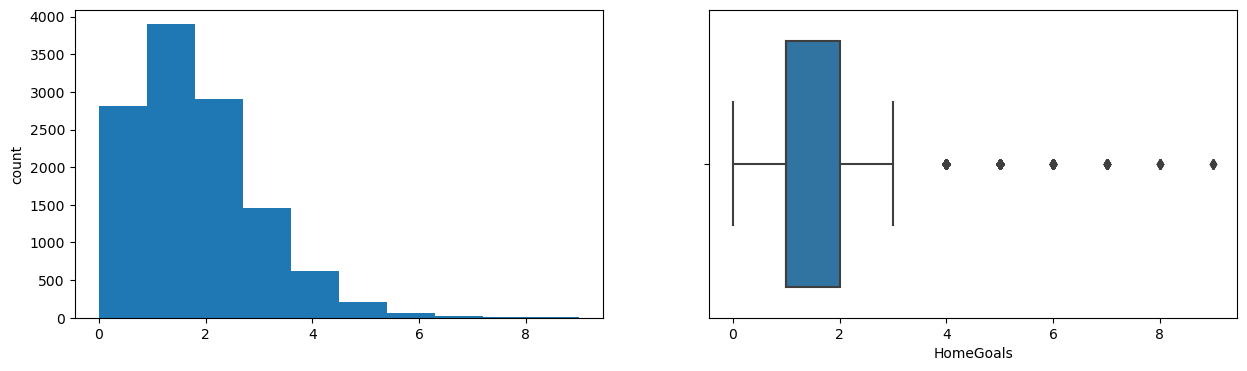

AwayGoals
Skew : 1.09


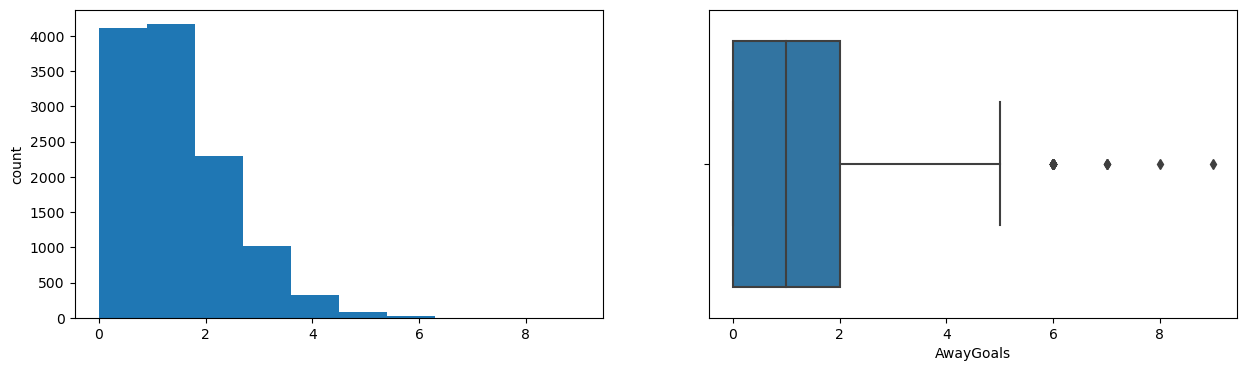

In [15]:
# Numerical Analysis

for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

# OBSERVATIONS:

 * The mean home goal scored ranges from 1 to 2 goals.
 * The mean away goal scored ranges from 0 to 2 goals.

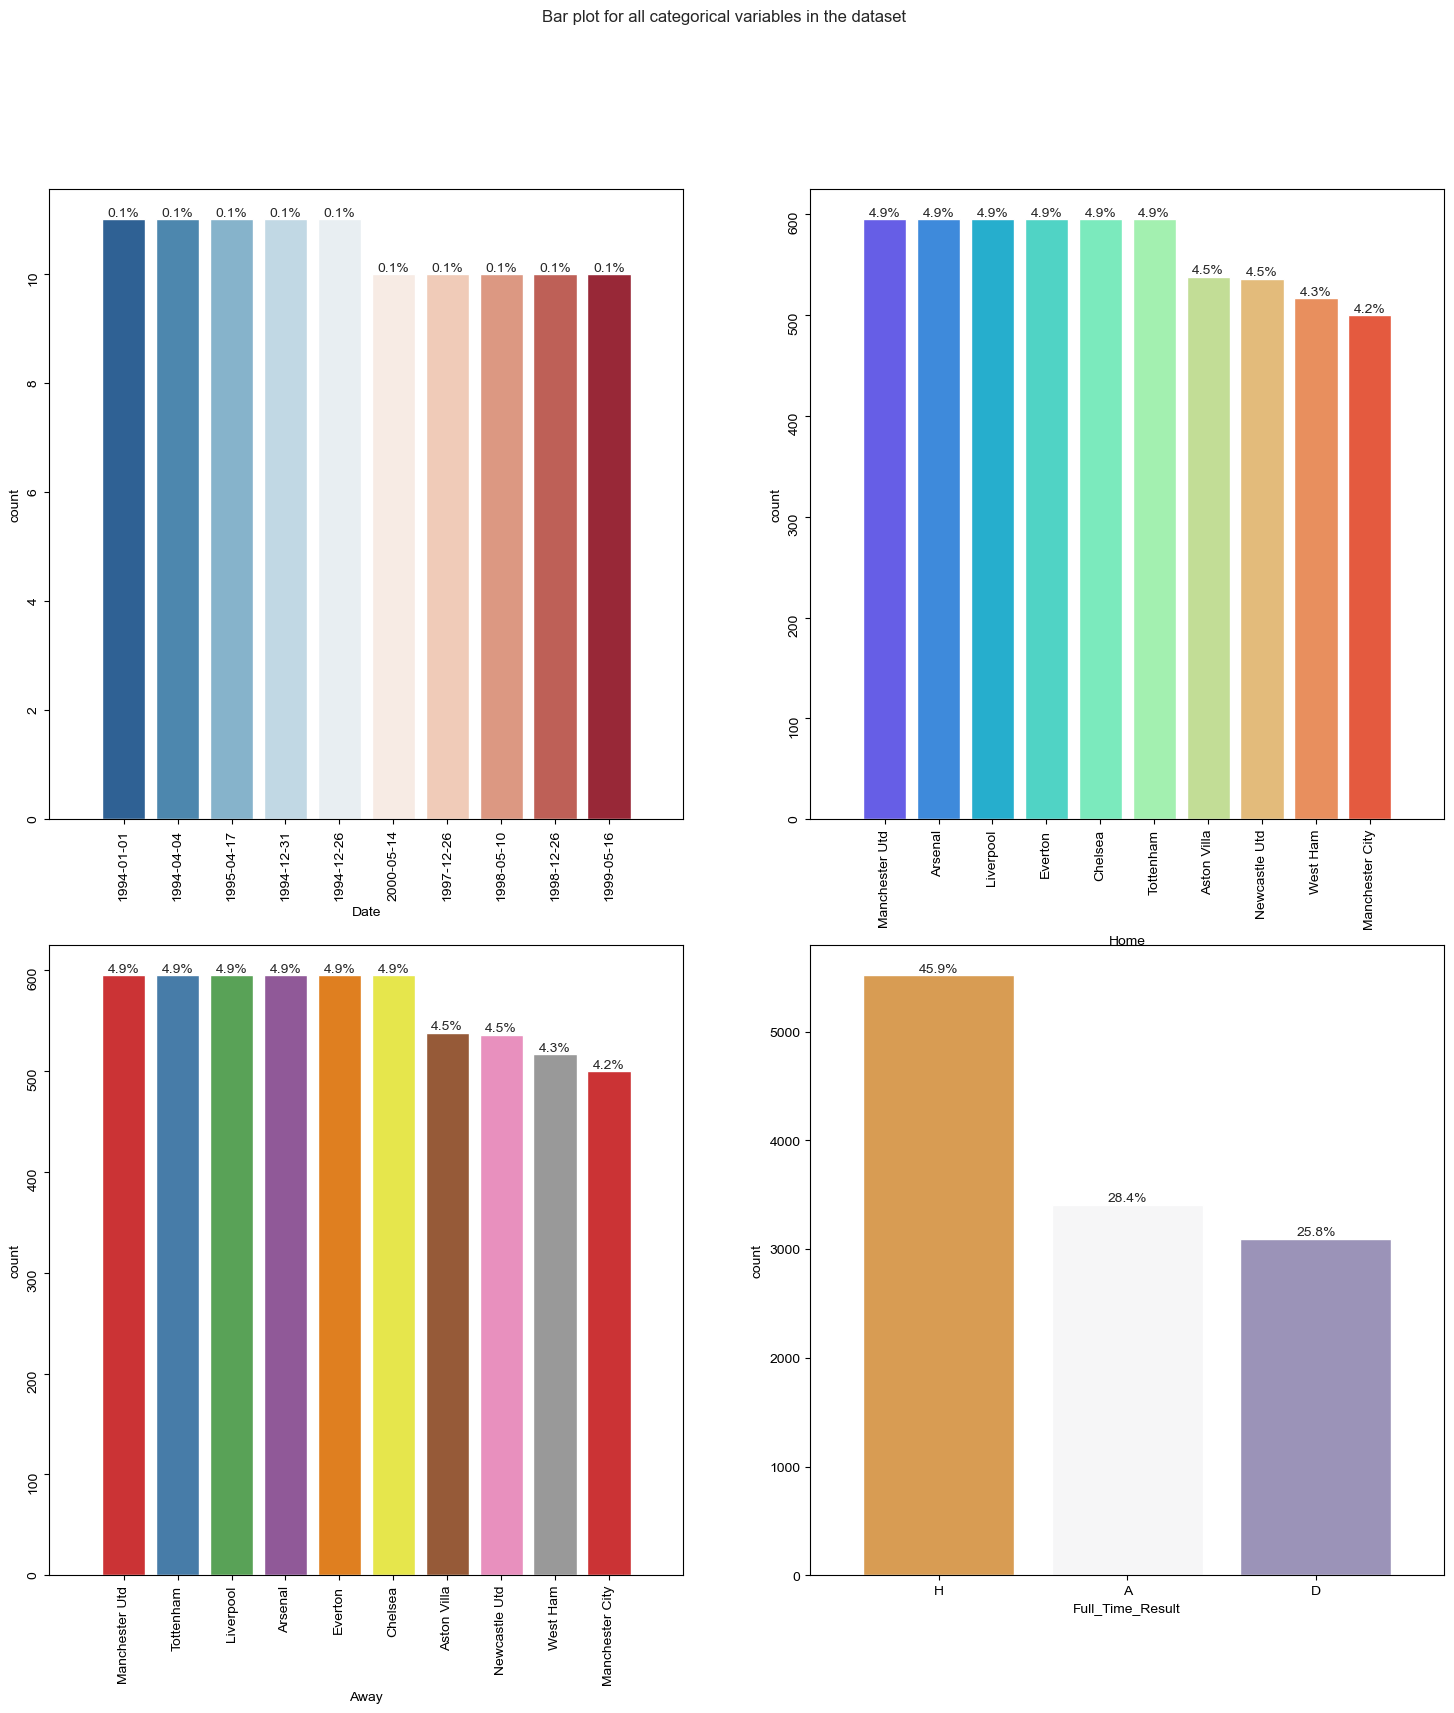

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
sns.set_style('whitegrid')
fig.suptitle('Bar plot for all categorical variables in the dataset')

ax = sns.countplot(ax = axes[0, 0], x = 'Date', data = data, palette = 'RdBu_r', 
              order = data['Date'].value_counts().head(10).index);
total = data['Date'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)

ax = sns.countplot(ax = axes[0, 1], x = 'Home', data = data, palette = 'rainbow',
             order = data['Home'].value_counts().head(10).index);
total = data['Home'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)


ax = sns.countplot(ax = axes[1, 0], x = 'Away', data = data, palette="Set1",
             order = data['Away'].value_counts().head(10).index);

total = data['Away'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)

ax = sns.countplot(ax = axes[1, 1], x = 'Full_Time_Result', data = data, palette="PuOr", 
              order = data['Full_Time_Result'].value_counts().head(20).index);

total = data['Full_Time_Result'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)

axes[0][0].tick_params(labelrotation=90);
axes[0][1].tick_params(labelrotation=90);
axes[1][0].tick_params(labelrotation=90);

# OBERVATIONS;

 * 01-01-1994, 04-04-1994, 04-17-1995, 12-31-1994 and 12-26-1994 recorded the highest maches played in a day, with 11 matches played on these days.
 * 45.9% of total maches played has seen gome team won their games.
 

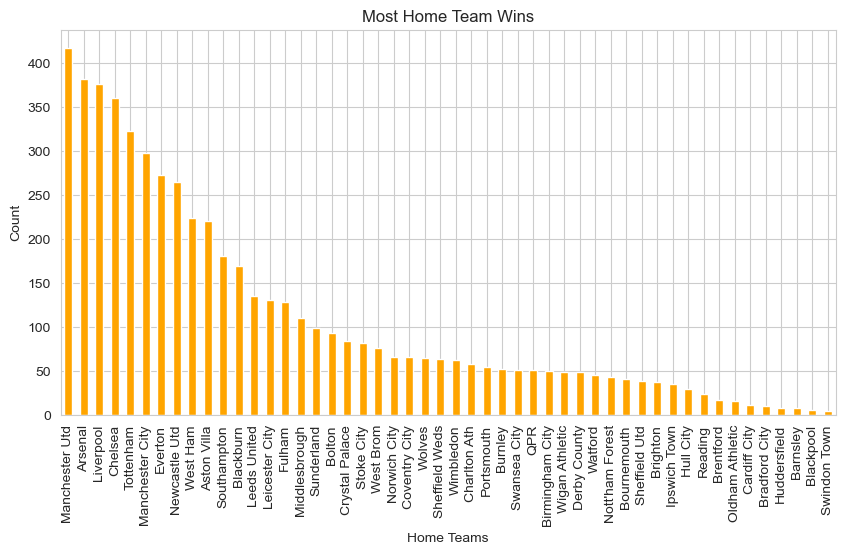

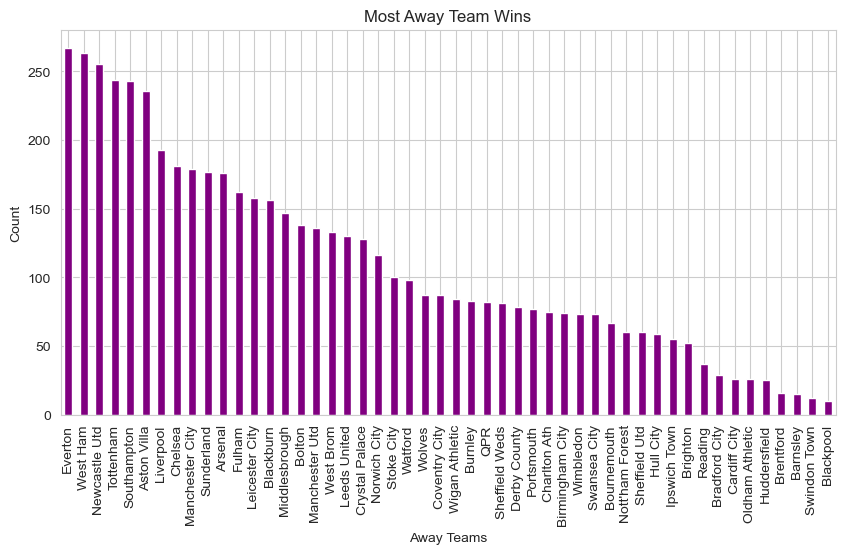

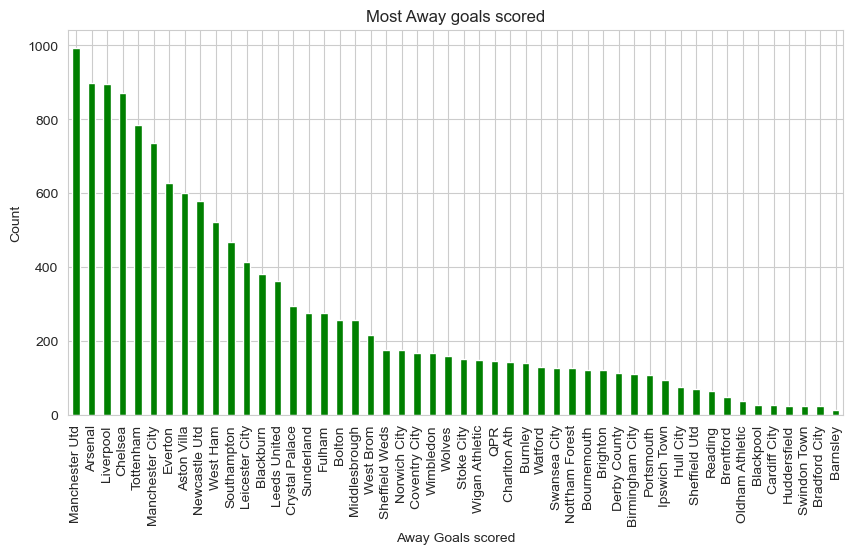

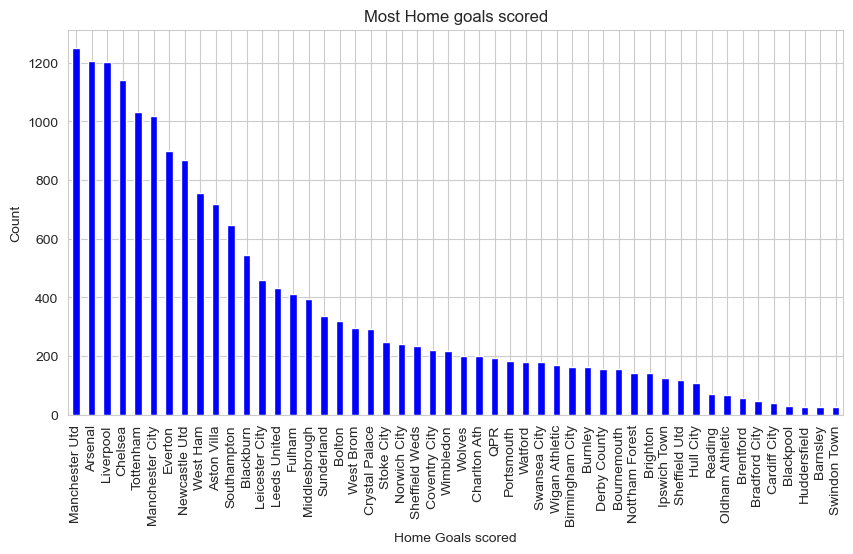

In [42]:
#Most Home Team Wins. group by Teams. Bar Graph
HomeWins = pd.concat([data.set_index("Home")["Home_Wins"].rename("Home_Wins")])
ax = HomeWins.groupby(level=0).sum().sort_values(ascending=False).plot.bar(figsize = (10,5), color = "orange")
ax.set(xlabel='Home Teams', ylabel='Count', title='Most Home Team Wins')
plt.show()

#Most Away Team Wins

AwayWins = pd.concat([data.set_index("Away")["Home_Wins"].rename("Away_Wins")])
ax = AwayWins.groupby(level=0).sum().sort_values(ascending=False).plot.bar(figsize = (10,5), color = "purple")
ax.set(xlabel='Away Teams', ylabel='Count', title='Most Away Team Wins')
plt.show()


#Most Away Goals Scored

ax = data.groupby(["Away"])["AwayGoals"].sum().sort_values(ascending=False).plot.bar(figsize = (10,5), color = "green")
ax.set(xlabel='Away Goals scored', ylabel='Count', title='Most Away goals scored')
plt.show()

#Most Home Goals Scored
ax = data.groupby("Home")["HomeGoals"].sum().sort_values(ascending=False).plot.bar(figsize = (10,5), color = "blue")
ax.set(xlabel='Home Goals scored', ylabel='Count', title='Most Home goals scored')
plt.show()

# EDA - Bivariate Analysis

Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

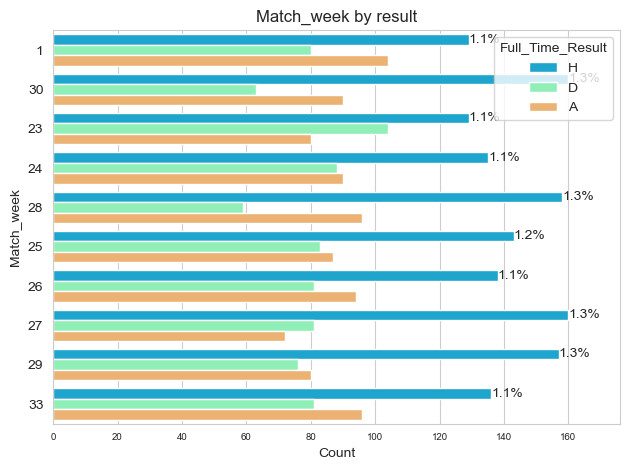

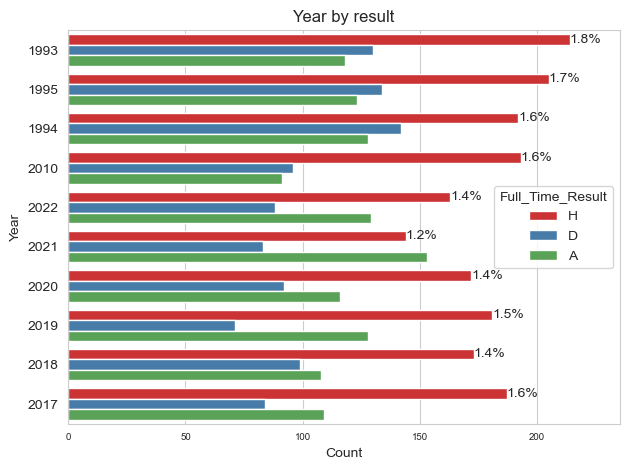

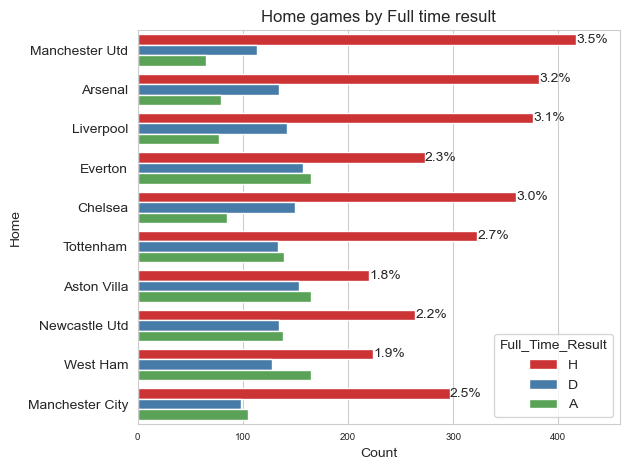

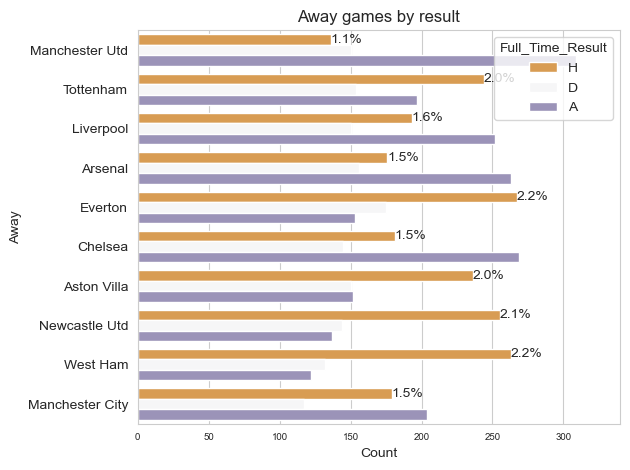

In [26]:
figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Match_week', hue = 'Full_Time_Result', data=data, palette='rainbow', order = data['Match_week'].value_counts().head(10).index)
total = data['Match_week'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Match_week', title='Match_week by result')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Year', hue = 'Full_Time_Result', data=data, palette='Set1', order = data['Year'].value_counts().head(10).index)
total = data['Year'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Year', title='Year by result')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()



figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Home', hue = 'Full_Time_Result', data=data, palette='Set1', order = data['Home'].value_counts().head(10).index)
total = data['Home'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Home', title='Home games by Full time result')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Away', hue = 'Full_Time_Result', data=data, palette='PuOr', order = data['Away'].value_counts().head(10).index)
total = data['Away'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Away', title='Away games by result')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

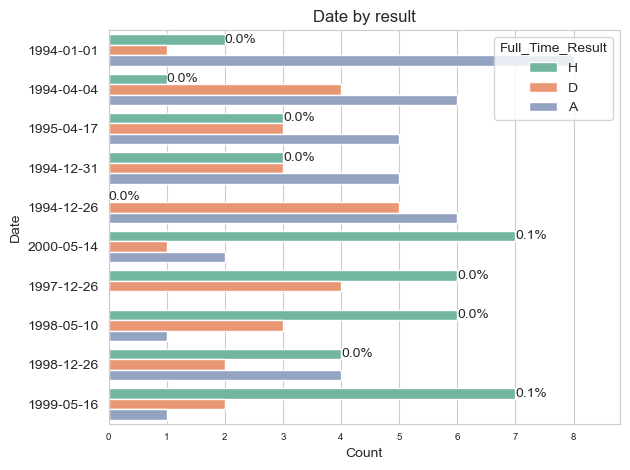

In [27]:
figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Date', hue = 'Full_Time_Result', data=data, palette='Set2', order = data['Date'].value_counts().head(10).index)
total = data['Date'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Date', title='Date by result')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show

<Figure size 1300x1700 with 0 Axes>

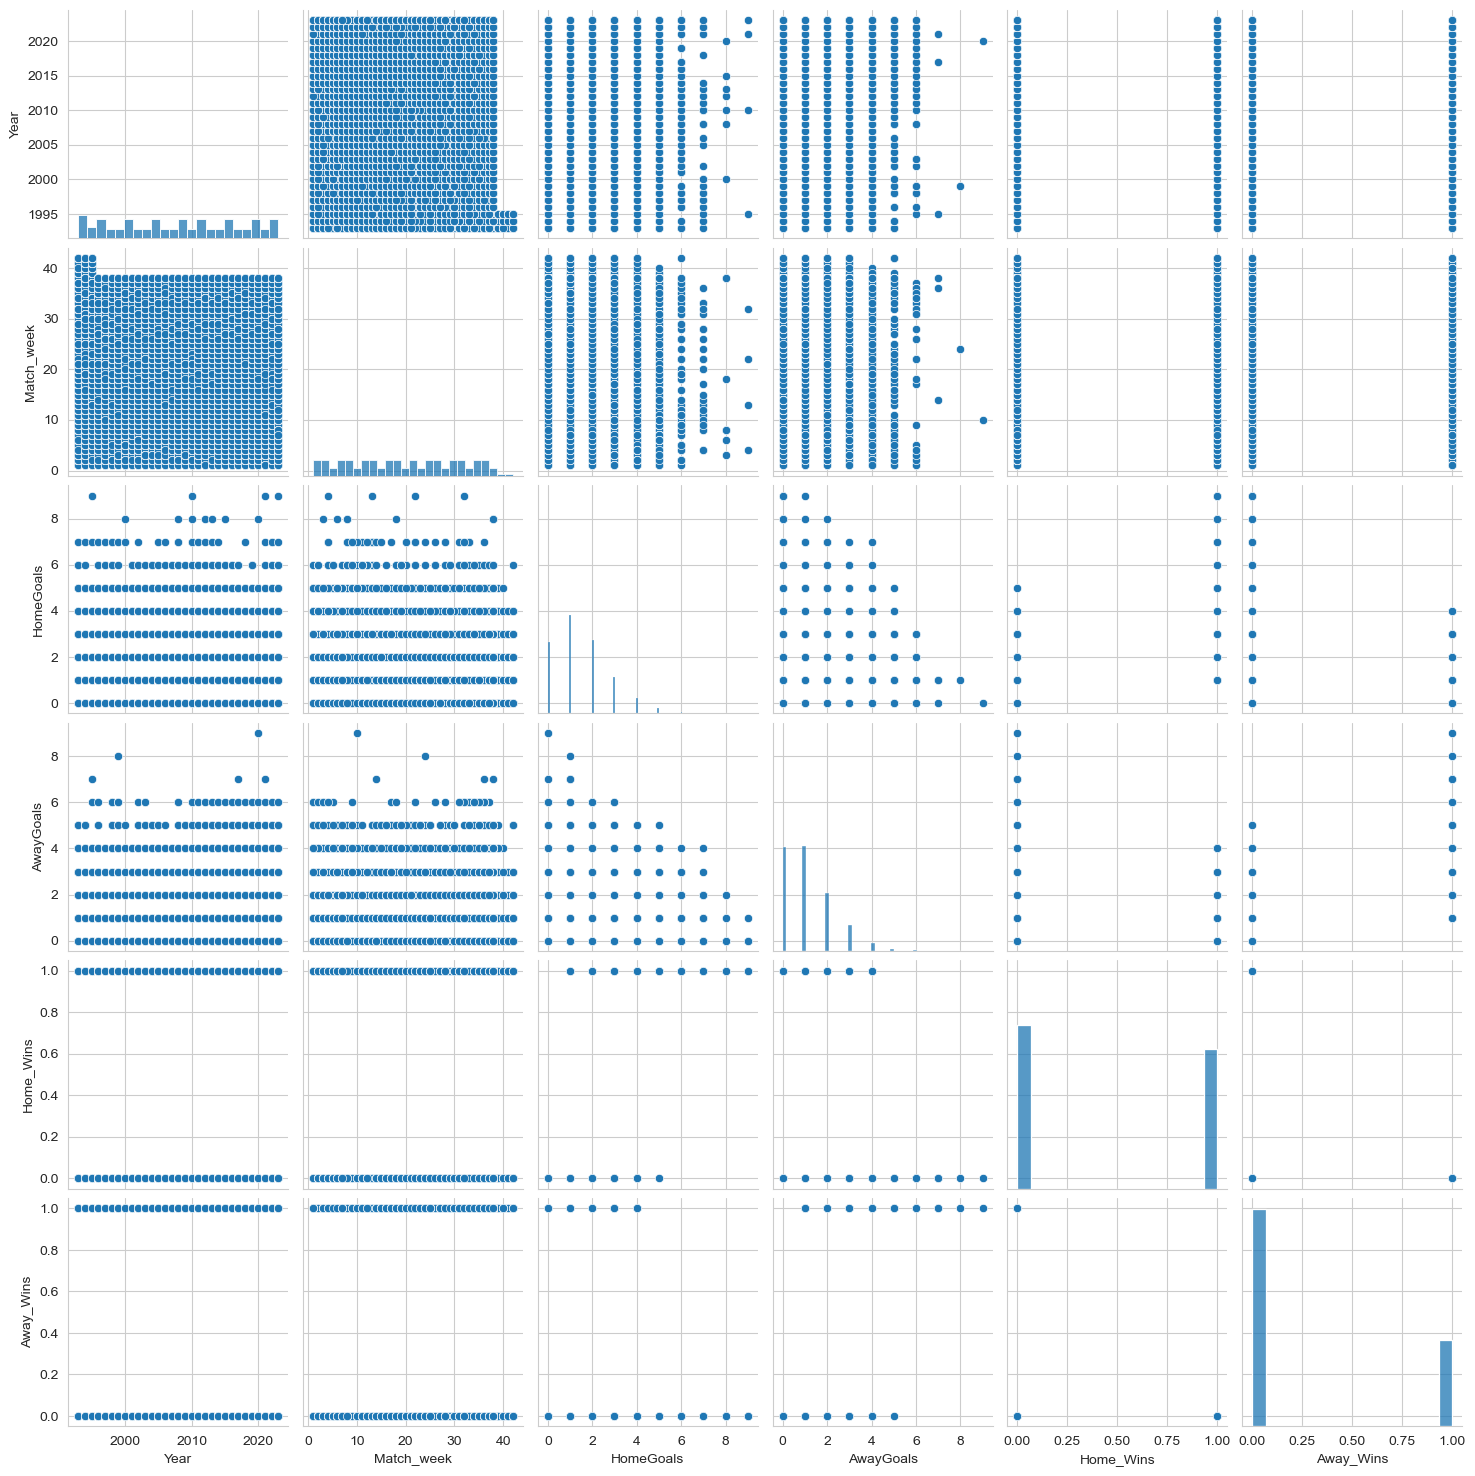

In [28]:
plt.figure(figsize=(13,17))
sns.pairplot(data)
plt.show()

# OBSERVATIONS;

 * The first 3 years(1993 to 1995) of the competion saw 42 match week for each team.
 * As home goal increases, away goals decreases.
 

# MULTIVARIATE ANALYSIS

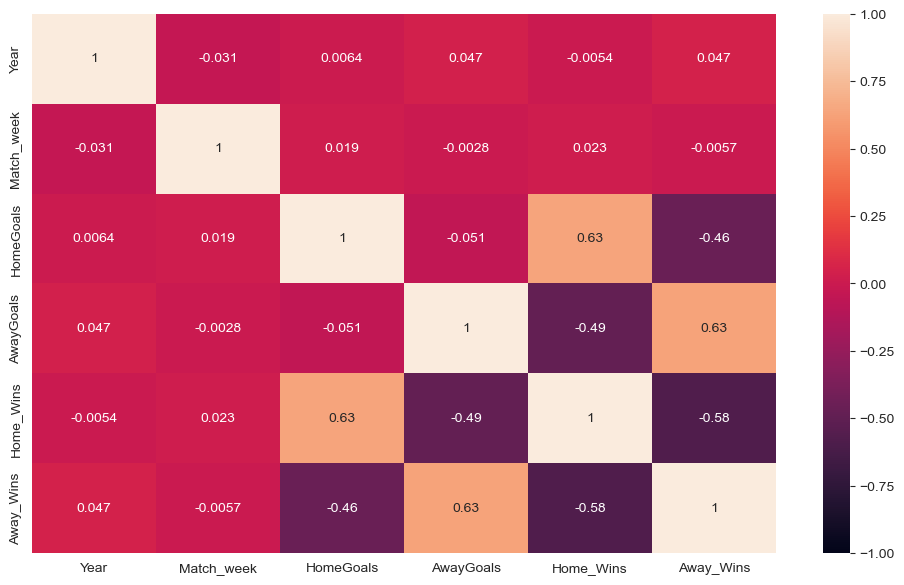

In [41]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Date', 'Home', 'Away', 'Full_Time_Result'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()